In [1]:
# Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from model import DynamicPricingModel, ProblemParameters
from visualization import (
    HotelPricingVisualizer, 
    AnimatedHotelPricingVisualizer,
    InteractiveHotelPricingVisualizer
)

ImportError: cannot import name 'AnimatedHotelPricingVisualizer' from 'visualization' (/Users/aeziz-local/Research/Projects-03-Hotel-Dynamic-Pricing/dynamic-pricing-for-multi-night-hotel-stays-a-MDP-approach-with-ML-integration/notebooks/visualization.py)

In [4]:
#For interactive plots
%matplotlib widget

ValueError: Key backend: 'module://ipympl.backend_nbagg' is not a valid value for backend; supported values are ['gtk3agg', 'gtk3cairo', 'gtk4agg', 'gtk4cairo', 'macosx', 'nbagg', 'notebook', 'qtagg', 'qtcairo', 'qt5agg', 'qt5cairo', 'tkagg', 'tkcairo', 'webagg', 'wx', 'wxagg', 'wxcairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template', 'inline']

2024-11-14 14:12:49,535 - INFO - Starting solution process...
2024-11-14 14:12:49,535 - INFO - Processing time period 2
Processing states for t=2: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1637.52it/s]
2024-11-14 14:12:49,682 - INFO - Processing time period 1
Processing states for t=1: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1766.67it/s]
2024-11-14 14:12:49,806 - INFO - Solution completed in 0.27 seconds
2024-11-14 14:12:49,819 - ERROR - Error in 3D plotting: 'HotelPricingVisualizer' object has no attribute 'model'


AttributeError: 'HotelPricingVisualizer' object has no attribute 'plot_pricing_policy_2d'

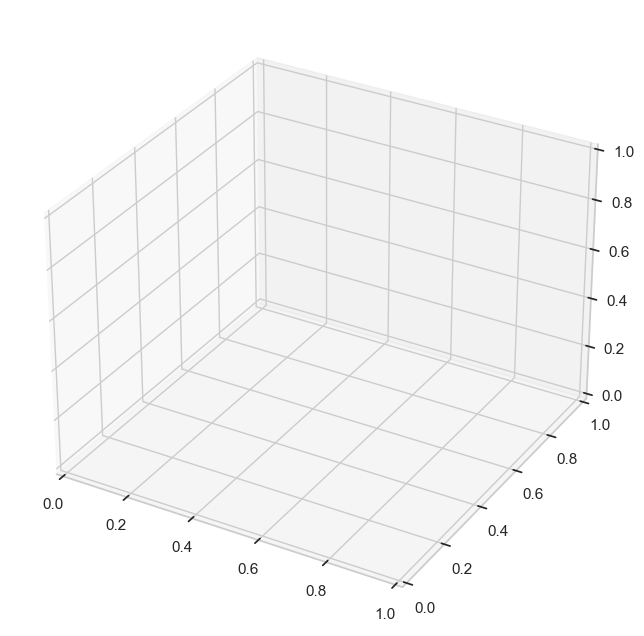

interactive(children=(IntSlider(value=3, description='Service Days:', max=5, min=2), IntSlider(value=2, descri…

In [5]:
# Define interactive parameter adjustment
@widgets.interact
def update_model_parameters(
    N=widgets.IntSlider(min=2, max=5, value=3, description='Service Days:'),
    T=widgets.IntSlider(min=1, max=5, value=2, description='Booking Periods:'),
    C=widgets.IntSlider(min=1, max=10, value=5, description='Capacity:'),
    price_min=widgets.FloatSlider(min=0, max=100, value=50, description='Min Price:'),
    price_max=widgets.FloatSlider(min=100, max=200, value=150, description='Max Price:'),
    price_levels=widgets.IntSlider(min=2, max=10, value=3, description='Price Levels:'),
    arrival_prob=widgets.FloatSlider(min=0.01, max=0.5, value=0.15, description='Arrival Prob:')
):
    params = ProblemParameters(
        N=N, T=T, C=C,
        price_min=price_min,
        price_max=price_max,
        price_levels=price_levels,
        arrival_prob_base=arrival_prob
    )
    
    # Create and solve model
    model = DynamicPricingModel(params)
    model.solve(use_parallel=False)
    
    # Get solution data
    solution_data = model.get_solution_data()
    
    # Create visualizer
    viz = HotelPricingVisualizer(solution_data)
    
    # Generate visualizations
    viz.plot_all()

## Basic Analysis

2024-11-14 14:12:56,157 - INFO - Starting solution process...
2024-11-14 14:12:56,171 - INFO - Processing time period 2
Processing states for t=2: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1515.99it/s]
2024-11-14 14:12:56,316 - INFO - Processing time period 1
Processing states for t=1: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1757.26it/s]
2024-11-14 14:12:56,440 - INFO - Solution completed in 0.28 seconds
2024-11-14 14:12:56,446 - ERROR - Error in 3D plotting: 'HotelPricingVisualizer' object has no attribute 'model'


AttributeError: 'HotelPricingVisualizer' object has no attribute 'plot_pricing_policy_2d'

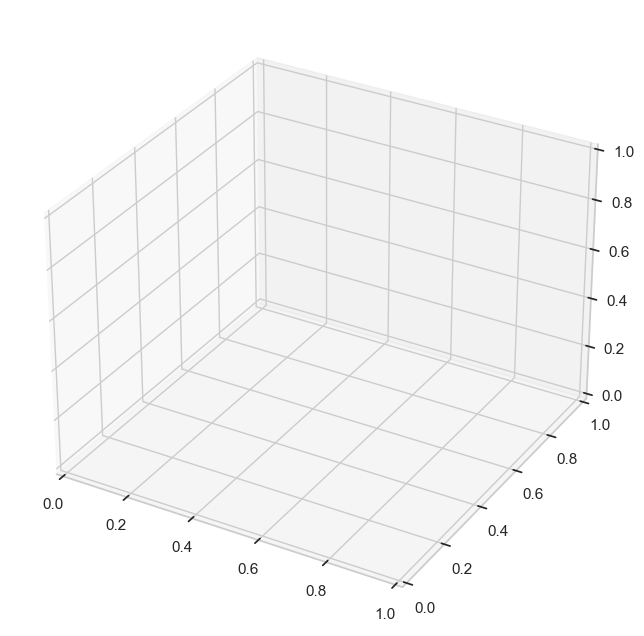

In [6]:
# Define base parameters
base_params = ProblemParameters(
    N=3, T=2, C=5,
    price_min=50.0,
    price_max=150.0,
    price_levels=3,
    arrival_prob_base=0.15
)

# Create and solve model
model = DynamicPricingModel(base_params)
model.solve(use_parallel=False)

# Create visualizer
solution_data = model.get_solution_data()
viz = HotelPricingVisualizer(solution_data)

# Generate specific visualizations
viz.plot_pricing_policy_3d()
viz.plot_value_function()

## Scenario Analysis

2024-11-14 14:14:11,238 - INFO - Starting solution process...
2024-11-14 14:14:11,240 - INFO - Processing time period 2
Processing states for t=2: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1521.17it/s]
2024-11-14 14:14:11,401 - INFO - Processing time period 1
Processing states for t=1: 100%|███████████████████████████████████████████████████████████████████████████| 216/216 [00:00<00:00, 1752.45it/s]
2024-11-14 14:14:11,525 - INFO - Solution completed in 0.29 seconds



Scenario 1:
Capacity: 5, Price Range: (50, 150)


AttributeError: 'HotelPricingVisualizer' object has no attribute 'model'

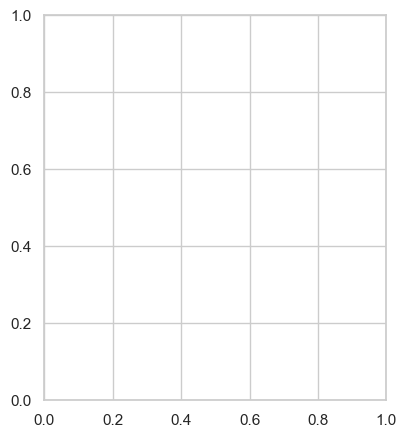

In [7]:
# Scenario analysis
def analyze_scenario(params: ProblemParameters):
    model = DynamicPricingModel(params)
    model.solve(use_parallel=False)
    return model.get_solution_data()

# Define scenarios
scenarios = [
    ProblemParameters(N=3, T=2, C=5, price_min=50, price_max=150, 
                     price_levels=3, arrival_prob_base=0.15),  # Base
    ProblemParameters(N=3, T=2, C=10, price_min=50, price_max=150, 
                     price_levels=3, arrival_prob_base=0.15),  # High capacity
    ProblemParameters(N=3, T=2, C=5, price_min=75, price_max=175, 
                     price_levels=3, arrival_prob_base=0.15),  # High prices
]

# Analyze each scenario
for i, params in enumerate(scenarios):
    solution_data = analyze_scenario(params)
    viz = HotelPricingVisualizer(solution_data)
    print(f"\nScenario {i+1}:")
    print(f"Capacity: {params.C}, Price Range: ({params.price_min}, {params.price_max})")
    viz.plot_value_function()
    plt.show()


## Animation Example

In [8]:
animated_viz = AnimatedHotelPricingVisualizer(solution_data)
animated_viz.animate_3d_policy()

NameError: name 'AnimatedHotelPricingVisualizer' is not defined

## Save Results

In [ ]:
import pickle
import datetime

def save_results(solution_data, filename=None):
    if filename is None:
        timestamp = datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f'hotel_pricing_results_{timestamp}.pkl'
    
    with open(filename, 'wb') as f:
        pickle.dump(solution_data, f)
    
    print(f'Results saved to {filename}')

# Save current results
save_results(solution_data)